# Abstract: This dataset describes the minimum daily temperatures over 10 years (1981-1990) in the city Melbourne, Australia.
The units are in degrees Celsius and there are 3650 observations. The source of the data is credited as the Australian
Bureau of Meteorology.This Dataset has two feature one is date and other is temperature recorded  according to daily. 

Now we will analyse the data and predict temperature for next couple month.In this project we will use python and some python supported third party library like pandas, numpy, matplotlib, statstools, time series model etc.

# Import neccesary library

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

import statsmodels.api as sm


from pmdarima.arima import auto_arima

from pylab import rcParams

from pandas.tseries.offsets import DateOffset

import warnings
warnings.filterwarnings('ignore')

# Load Dataset

In [2]:
data=pd.read_csv(r'D:\personal\family\Machine Learning Projects Final\Datasets\Temperature.csv')
data.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


# Data Processing

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3650 non-null   object 
 1   Temp    3650 non-null   float64
dtypes: float64(1), object(1)
memory usage: 57.2+ KB


In [4]:
#Date column is showing it is an object & there is no na value 

In [5]:
data.isna().sum()

Date    0
Temp    0
dtype: int64

In [6]:
#Make Date column to Date Object

data['Date']=pd.to_datetime(data['Date'])

In [7]:
data.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [8]:
#Make Date column to index
data.set_index('Date',inplace=True)

In [9]:
data=data.asfreq('d')

In [10]:
data.isna().sum()

Temp    2
dtype: int64

In [11]:
#fill missing temperature with method ffill
data=data.fillna(method='ffill')

In [12]:
data.isna().sum()

Temp    0
dtype: int64

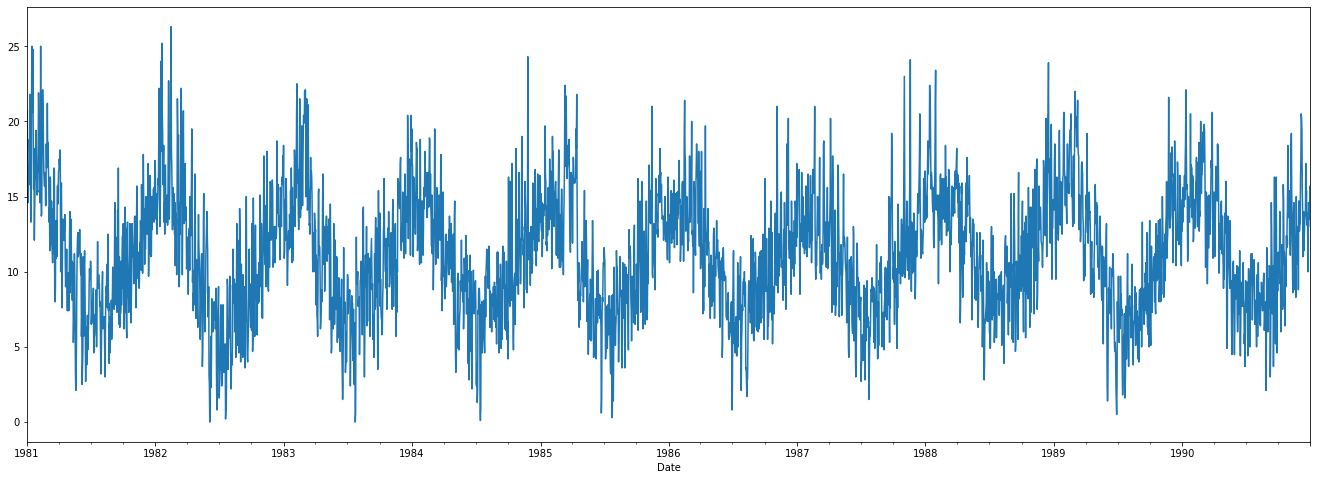

In [13]:
data['Temp'].plot(figsize=(23,8))
plt.show()

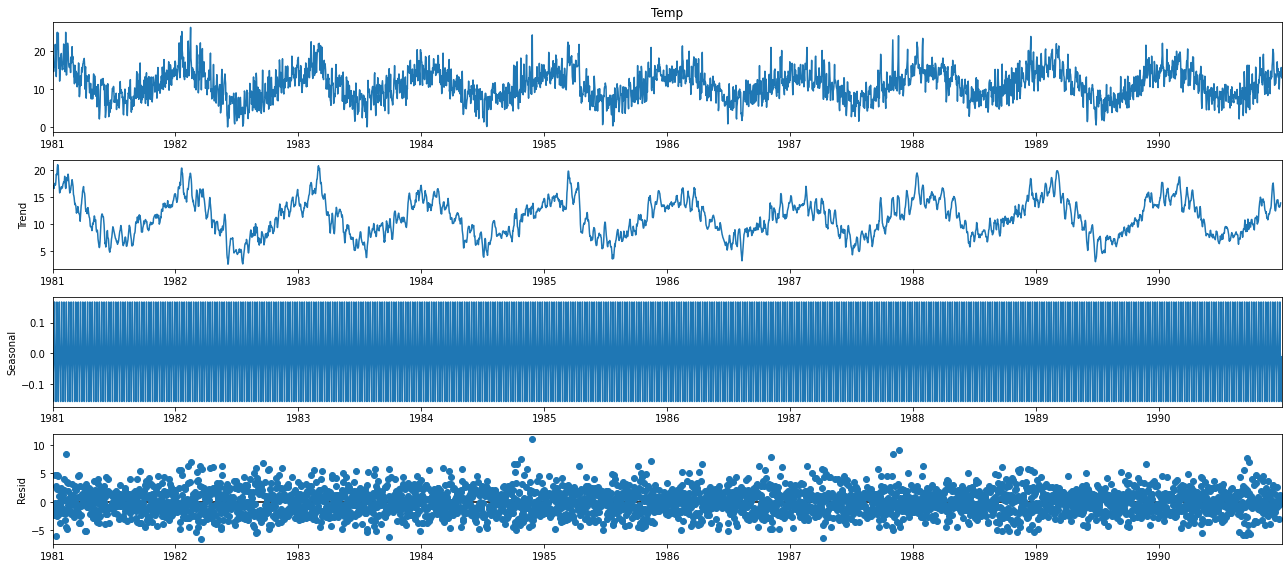

In [14]:
#Decompose the data 

rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(x=data['Temp'])
fig = decomposition.plot()
plt.show()


check if the series is stationary using the Augmented Dickey Fuller test

The null hypothesis of the ADF test is that the time series is non-stationary. So, if (p <0.05) then you reject the null hypothesis and infer that the time series is stationary.

In [15]:
result = adfuller(data['Temp'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -4.440934
p-value: 0.000251


In [16]:
#It rejects the null hypothesis. so it is stationary 

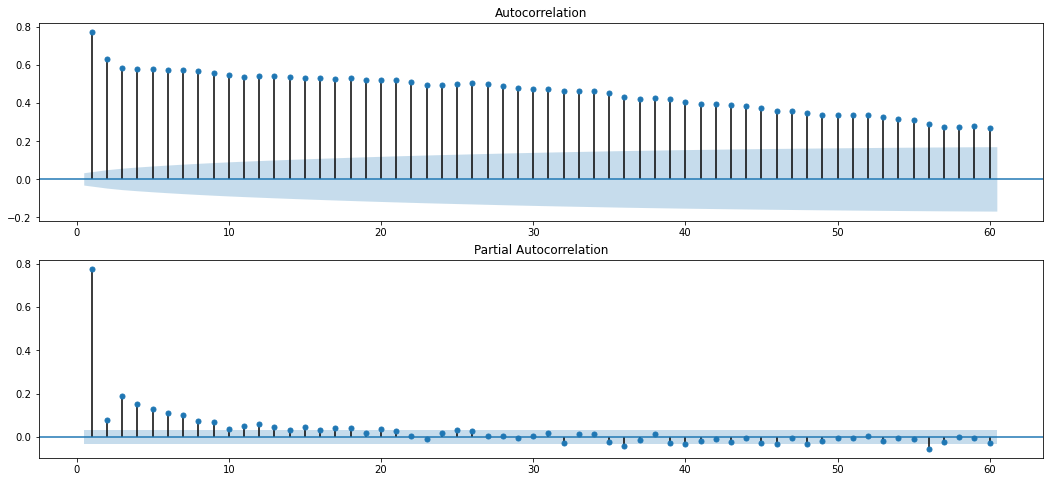

In [17]:
fig, ax = plt.subplots(2,1)
fig = sm.graphics.tsa.plot_acf(data['Temp'],zero=False, lags=60, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(data['Temp'], zero=False, lags=60, ax=ax[1])
plt.show()

In acf and pacf plot shows todays temperature is depend on previous day temperatures. After one lag value the autocorrelation is drecreasing.

# Model

In [60]:
arima=auto_arima(data['Temp'])

In [61]:
arima

ARIMA(maxiter=50, method='lbfgs', order=(3, 0, 1), out_of_sample_size=0,
      scoring='mse', scoring_args=None, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=False, trend=None,
      with_intercept=True)

In [18]:
arima_m1=ARIMA(data['Temp'], order=(10,0,7))  #p=3(ar) d=0 (differentiate) q=1(ma)

In [19]:
result1=arima_m1.fit()


In [20]:
result1.aic

16792.65885847932

In [25]:
# data['Temp'].plot(figsize=(23,8))
# plt.show()

In [21]:
data.tail(20)

,Temp
Date,
1990-12-12,14.0
1990-12-13,11.4
1990-12-14,12.5
1990-12-15,13.4
1990-12-16,13.6
1990-12-17,13.9
1990-12-18,17.2
1990-12-19,14.7
1990-12-20,15.4


In [27]:
# import itertools
# #set parameter range
# p = range(0,4)
# q = range(0,2)
# d = range(0,1)
# s =range(12,13)
# # list of all parameter combos
# pdq = list(itertools.product(p, d, q))

# print(pdq)

# seasonal_pdq = list(itertools.product(p, d, q, s))


# print(seasonal_pdq)


[(0, 0, 0), (0, 0, 1), (1, 0, 0), (1, 0, 1), (2, 0, 0), (2, 0, 1), (3, 0, 0), (3, 0, 1)]
[(0, 0, 0, 12), (0, 0, 1, 12), (1, 0, 0, 12), (1, 0, 1, 12), (2, 0, 0, 12), (2, 0, 1, 12), (3, 0, 0, 12), (3, 0, 1, 12)]


In [28]:
# #SARIMA model pipeline
# for param in pdq:
#     for param_seasonal in seasonal_pdq:
#         try:
#             mod = sm.tsa.statespace.SARIMAX(data['Temp'],
#                                     order=param,
#                                     seasonal_order=param_seasonal)
#             results = mod.fit(max_iter = 50, method = 'powell')
#             print('SARIMA{},{}  AIC:{}'.format(param, param_seasonal, results.aic))
#         except:
#             continue

Optimization terminated successfully.
         Current function value: 3.895329
         Iterations: 1
         Function evaluations: 21
SARIMA(0, 0, 0),(0, 0, 0, 12)  AIC:28453.48201067343
Optimization terminated successfully.
         Current function value: 3.469797
         Iterations: 2
         Function evaluations: 48
SARIMA(0, 0, 0),(0, 0, 1, 12)  AIC:25347.395806873214
Optimization terminated successfully.
         Current function value: 2.767313
         Iterations: 1
         Function evaluations: 24
SARIMA(0, 0, 0),(1, 0, 0, 12)  AIC:20216.455713286752
Optimization terminated successfully.
         Current function value: 2.633666
         Iterations: 3
         Function evaluations: 113
SARIMA(0, 0, 0),(1, 0, 1, 12)  AIC:19242.293755056293
Optimization terminated successfully.
         Current function value: 2.660746
         Iterations: 1
         Function evaluations: 38
SARIMA(0, 0, 0),(2, 0, 0, 12)  AIC:19440.08914959267
Optimization terminated successfully.
        

Optimization terminated successfully.
         Current function value: 2.309892
         Iterations: 8
         Function evaluations: 1191
SARIMA(2, 0, 1),(1, 0, 1, 12)  AIC:16883.449997967648
Optimization terminated successfully.
         Current function value: 2.484018
         Iterations: 3
         Function evaluations: 228
SARIMA(2, 0, 1),(2, 0, 0, 12)  AIC:18155.265182630203
Optimization terminated successfully.
         Current function value: 2.306196
         Iterations: 11
         Function evaluations: 960
SARIMA(2, 0, 1),(2, 0, 1, 12)  AIC:16858.454665049103
Optimization terminated successfully.
         Current function value: 2.444277
         Iterations: 3
         Function evaluations: 256
SARIMA(2, 0, 1),(3, 0, 0, 12)  AIC:17866.998268364736
Optimization terminated successfully.
         Current function value: 2.306382
         Iterations: 12
         Function evaluations: 1117
SARIMA(2, 0, 1),(3, 0, 1, 12)  AIC:16861.817419433813
Optimization terminated successfully

In [ ]:
# (3, 0, 1),(0, 0, 0, 12)

In [56]:
# model=sm.tsa.statespace.SARIMAX(data['Temp'],order=(3, 0, 1),seasonal_order=(0, 0, 0, 12))
# results=model.fit()

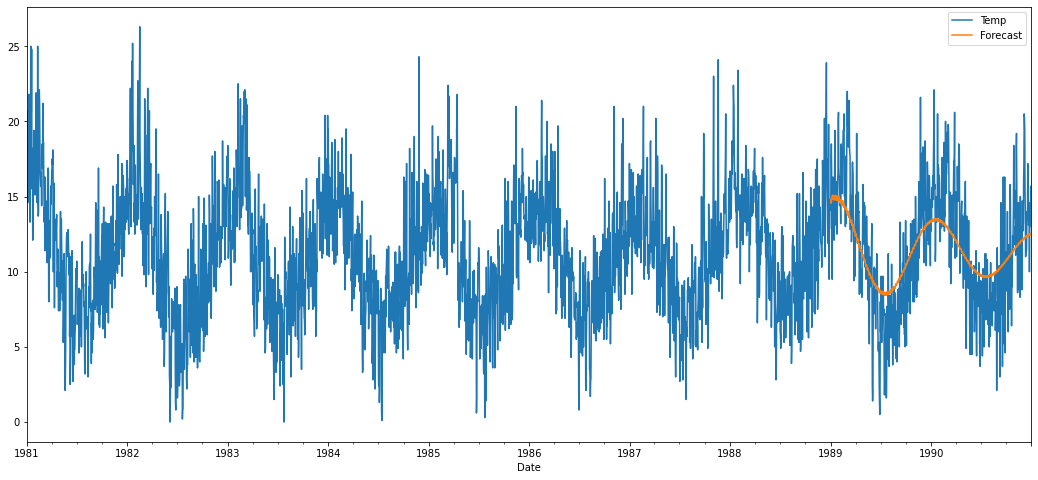

In [22]:
data['Forecast']=result1.predict(start='1989-01-01',end='1990-12-31',dynamic=True)
data.plot(figsize=(18,8))
plt.show()

In [23]:

future_dates=[data.index[-1]+ DateOffset(days=x)for x in range(0,24)]

In [24]:
future_dates_df=pd.DataFrame(index=future_dates[1:],columns=data.columns)

In [25]:
previous_and_future_data=pd.concat([data,future_dates_df])

In [26]:
previous_and_future_data.tail(25)

,Temp
1990-12-30,15.7
1990-12-31,13.0
1991-01-01,NaN
1991-01-02,NaN
1991-01-03,NaN
1991-01-04,NaN
1991-01-05,NaN
1991-01-06,NaN
1991-01-07,NaN
1991-01-08,NaN


In [28]:
previous_and_future_data['forecast'] = result1.predict(start = '1991-01-01', end = '1991-01-23', dynamic= True)  
previous_and_future_data.tail(24)

,Temp,forecast
1990-12-31,13.0,NaN
1991-01-01,NaN,13.233231
1991-01-02,NaN,13.657915
1991-01-03,NaN,13.449682
1991-01-04,NaN,13.212247
1991-01-05,NaN,13.532192
1991-01-06,NaN,13.689844
1991-01-07,NaN,13.483840
1991-01-08,NaN,13.266861
1991-01-09,NaN,13.456396
